In [1]:
import os
import django
import sys
sys.path.append('../')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "activity_viewer.settings")
django.setup()

In [2]:
from dashboard.models import Log
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# kwargs match the name of the field in the class definition in models.p
full_file_download_logs = Log.objects.filter(http_status=200)
# Double underscore follows a foreign key relationship and accesses a field there
# Example: Log has an item foreign key which has an experiment foreign key which has a field called 'name'
# Notice that queries can be chained together. They are executed lazily, when the data is actually fetched and used
wanted_log_fields = full_file_download_logs.values_list('pk', 'ip_address', 's3_key', 'item__experiment__name', 'item__lab__name')

In [4]:
# Necessary to create columns since we used values_list, not values, which is a tuple not a dictionary
logs_df = pd.DataFrame(wanted_log_fields, columns=['pk', 'ip', 'key', 'experiment', 'lab'])

In [5]:
# A unique combo of key and ip drops the times when the same computer downloaded a file multiple times
# This is usually faster than the database since it is only in-memory
unique_downloads_df = logs_df.drop_duplicates(subset=['key', 'ip'])
# Finding the experiment that have the most logs representing a unique download
most_uniquely_used_experiments = unique_downloads_df.groupby(by='experiment').size().sort_values(ascending=False)[:16]

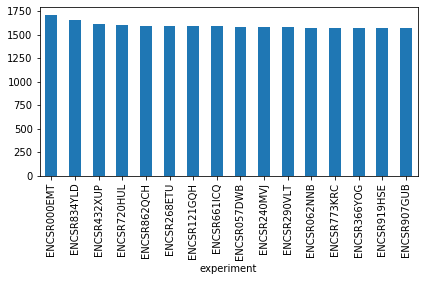

In [6]:
most_uniquely_used_experiments.plot(kind='bar')
# Necessary to make the long titles fit
plt.tight_layout()
# 300 DPI provides a nice crisp image
plt.savefig('experiment_plot.png', dpi=300)

In [7]:
# Same idea as before but now with lab not experiment
labs_with_most_uniquely_accessed_files = unique_downloads_df.groupby('lab').size().sort_values(ascending=False)[:16]

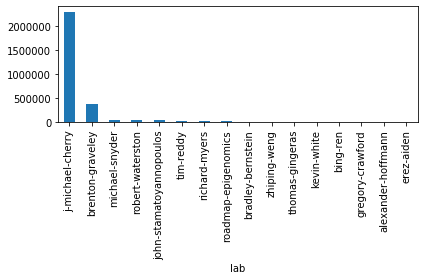

In [8]:
labs_with_most_uniquely_accessed_files.plot(kind='bar')
plt.tight_layout()
plt.savefig('lab_plot.png', dpi=300)
